In [177]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'detectron2' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [179]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Run a pre-trained detectron2 mode

We first download an image from the COCO dataset:

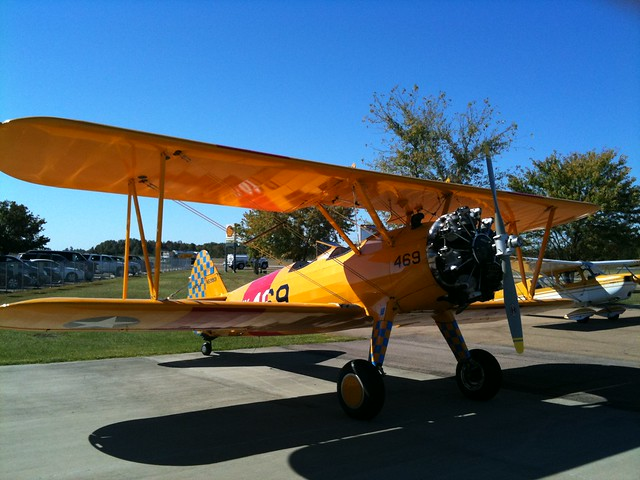

480
480
480
b type? <class 'tuple'>
new image type? <class 'numpy.ndarray'>
width:   640
height:  480
channel: 3


In [180]:
!wget https://farm5.staticflickr.com/4147/5087832865_a8a388de44_z.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)
#image size
h,w,c=im.shape




b,g,r = cv2.split(im)

print(len(b))
print(len(g))
print(len(r))

print("b type?",type(b.shape))


newImage = im.copy() #it should do deep copy

print("new image type?",type(newImage))
print('width:  ', w)
print('height: ', h)
print('channel:', c)

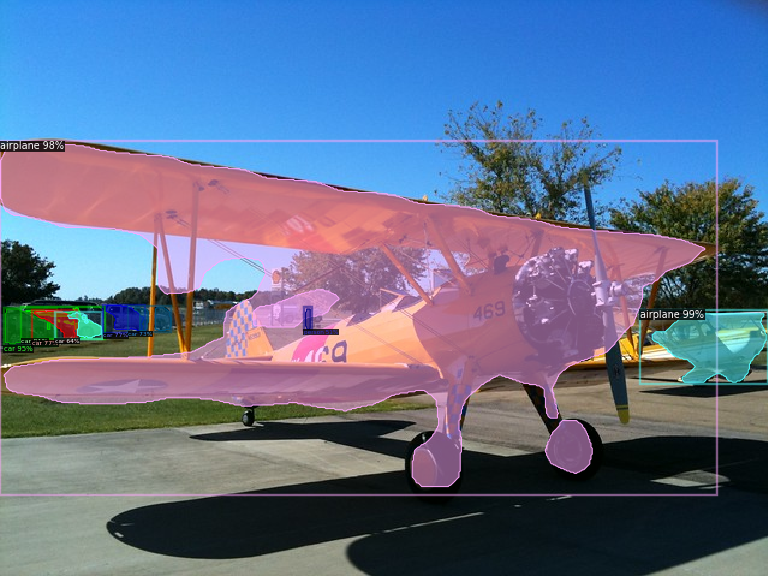

In [181]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg) 
outputs = predictor(im) #lomed et hatmuna
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

#tmuna mispar ehad mishtane out

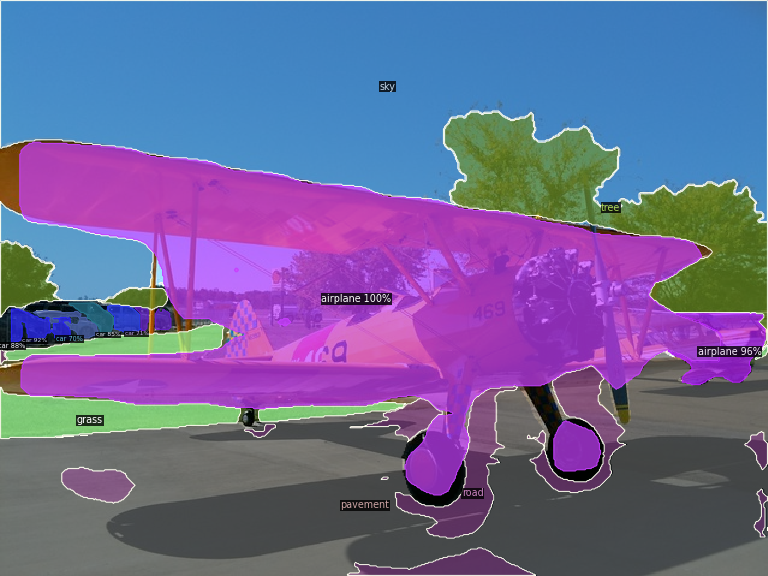

In [182]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg)

bohen_tmuna = predictor(im)

panoptic_seg, segments_info = bohen_tmuna["panoptic_seg"]
m_d_c = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(im[:, :, ::-1], m_d_c, scale=1.2)
out2 = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out2.get_image()[:, :, ::-1])



#


In [183]:
type(out.get_image())

numpy.ndarray

In [184]:
segments_info

[{'id': 1,
  'isthing': True,
  'score': 0.9962971806526184,
  'category_id': 4,
  'instance_id': 0,
  'area': 85356.0},
 {'id': 2,
  'isthing': True,
  'score': 0.9628826975822449,
  'category_id': 4,
  'instance_id': 1,
  'area': 2585.0},
 {'id': 3,
  'isthing': True,
  'score': 0.9213991761207581,
  'category_id': 2,
  'instance_id': 2,
  'area': 511.0},
 {'id': 4,
  'isthing': True,
  'score': 0.8823044896125793,
  'category_id': 2,
  'instance_id': 3,
  'area': 918.0},
 {'id': 5,
  'isthing': True,
  'score': 0.8525194525718689,
  'category_id': 2,
  'instance_id': 4,
  'area': 482.0},
 {'id': 6,
  'isthing': True,
  'score': 0.7076273560523987,
  'category_id': 2,
  'instance_id': 5,
  'area': 352.0},
 {'id': 7,
  'isthing': True,
  'score': 0.7040168046951294,
  'category_id': 2,
  'instance_id': 6,
  'area': 500.0},
 {'id': 8, 'isthing': False, 'category_id': 21, 'area': 12030.0},
 {'id': 9, 'isthing': False, 'category_id': 37, 'area': 22254.0},
 {'id': 10, 'isthing': False, 'c

In [185]:
type(out)

detectron2.utils.visualizer.VisImage

In [186]:
get_area = 0
for item in segments_info:
           if item.get('isthing')==False and item.get('category_id')== 40: #anahnu bodkim she ze le mashu pashut
                    get_area = item.get('area')
                    print(m_d_c.stuff_classes[40]) #entering methadata catalog 
                    print(get_area)

sky
93353.0


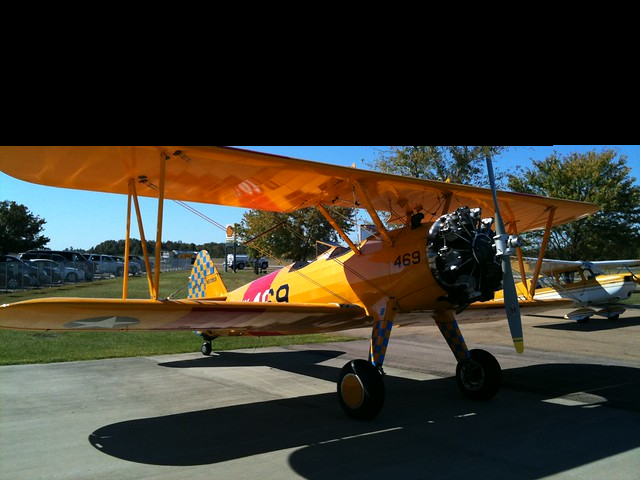

new_i =  145 new_j =  639


In [187]:
c = 0

new_i = 0
new_j = 0
flag = False
for i in range(h):
 for j in range(w):
    if(c<get_area):
      #print(i,j)
      newImage[i][j][0] = 0
      newImage[i][j][1] = 0
      newImage[i][j][2] = 0

      c+=1
    else:
          new_i = i
          new_j = j
          flag = True
 if flag==True: #getting out from 2 loops
   break

      
cv2_imshow(newImage) 
print("new_i = ",new_i,"new_j = ",new_j)
#ze bdika

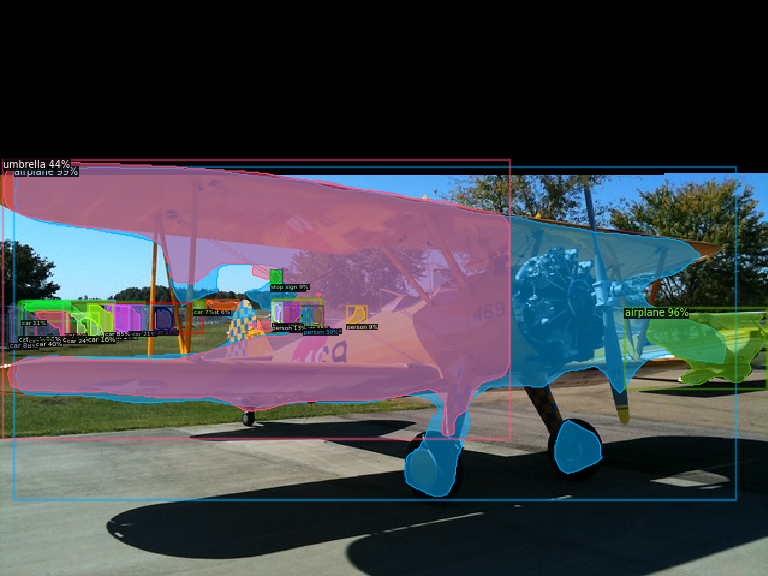

In [188]:
#we have predictor already
outputs = predictor(newImage)
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(newImage[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out3 = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out3.get_image()[:, :, ::-1])


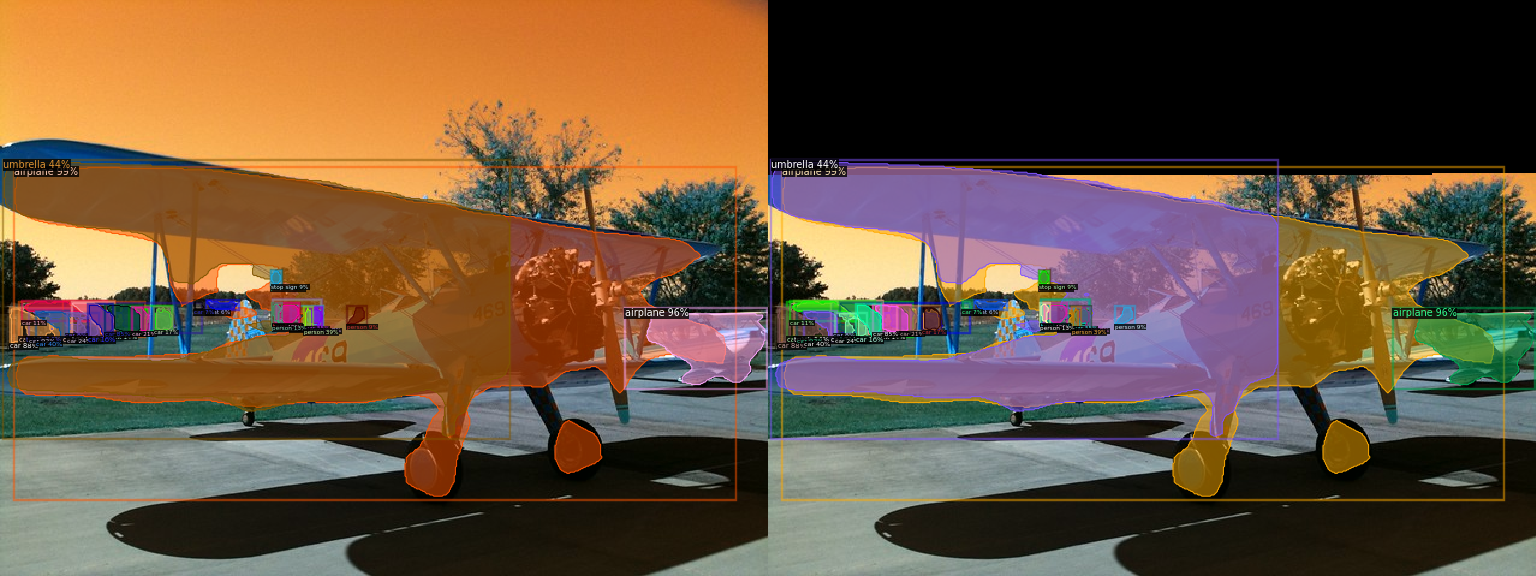

True

In [193]:
vis = np.concatenate((out.get_image(), out3.get_image()), axis=1)

cv2_imshow(vis)
cv2.imwrite('out.png', vis)

In [190]:
type(out.get_image())

numpy.ndarray

In [191]:
out2

<class 'detectron2.utils.visualizer.Visualizer'>


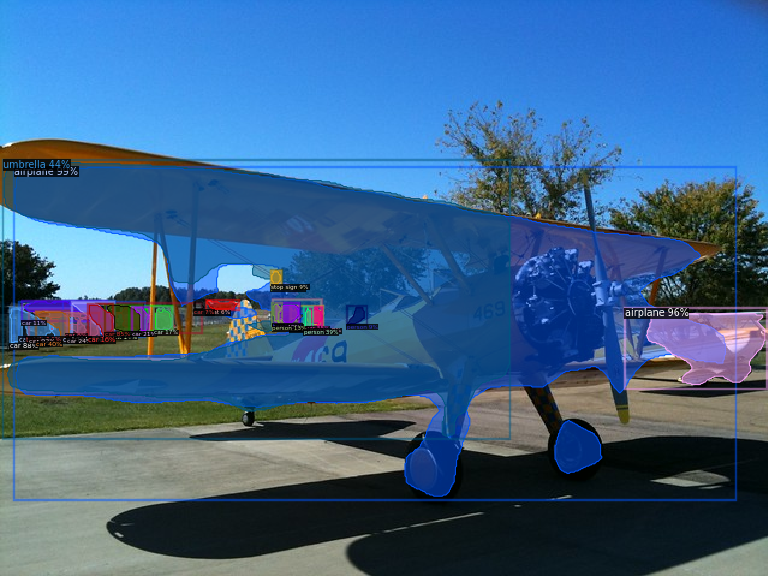

In [192]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
print(type(v))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

Train on a custom dataset